# Importing Required Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
from scipy.stats.distributions import chi2
import statsmodels.tsa.stattools as sts 
from statsmodels.tsa.arima_model import ARMA
import seaborn as sns
sns.set()

from sklearn.metrics import mean_squared_error
from math import sqrt

import warnings
warnings.filterwarnings("ignore")

# Log-Likelihood Test 

In [2]:
def LLR_test(mod_1, mod_2, DF=1):
    L1 = mod_1.llf
    L2 = mod_2.llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR, DF).round(3)
    return p

# Reading the Dataset

### Full Dataset

In [3]:
data = pd.read_csv('web_scrapped_data.csv')
data = data.drop([0], axis=0)
data.Date = pd.to_datetime(data.Date)
data = data.set_index('Date')

data.head()

,spx,dax,ftse,nikkei,spx_norm,dax_norm,ftse_norm,nikkei_norm,spx_ret,ftse_ret,dax_ret,nikkei_ret,spx_ret_norm,ftse_ret_norm,dax_ret_norm,nikkei_ret_norm,spx_vol,dax_vol,ftse_vol,nikkei_vol
Date,,,,,,,,,,,,,,,,,,,,
1994-01-06,467.119995,2220.629883,3403.000000,18124.009766,100.000000,100.000000,100.000000,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994-01-07,469.899994,2224.949951,3446.000000,18124.009766,100.595136,100.194542,101.263591,100.000000,0.595136,1.263591,0.194542,-2.069078e-09,100.000000,100.000000,100.000000,1.000000e+02,0.354187,0.037847,1.596662,4.281085e-18
1994-01-10,475.269989,2225.000000,3440.600098,18443.439453,101.744732,100.196796,101.104910,101.762467,1.142795,-0.156701,0.002249,1.762467e+00,192.022581,-12.401212,1.156270,-8.518126e+10,1.305981,0.000005,0.024555,3.106290e+00
1994-01-11,474.130005,2228.100098,3413.800049,18485.250000,101.500687,100.336401,100.317368,101.993158,-0.239860,-0.778935,0.139330,2.266960e-01,-40.303454,-61.644578,71.619440,-1.095638e+10,0.057533,0.019413,0.606740,5.139109e-02
1994-01-12,474.170013,2182.060059,3372.000000,18793.880859,101.509252,98.263113,99.089039,103.696042,0.008438,-1.224443,-2.066336,1.669606e+00,1.417879,-96.901880,-1062.151695,-8.069323e+10,0.000071,4.269745,1.499262,2.787584e+00


### Traininig Data

In [4]:
train_df = pd.read_csv('train.csv')
train_df = train_df.drop([0], axis=0)
train_df.Date = pd.to_datetime(train_df.Date)
train_df = train_df.set_index('Date')

train_df.head()

,spx,dax,ftse,nikkei,spx_norm,dax_norm,ftse_norm,nikkei_norm,spx_ret,ftse_ret,dax_ret,nikkei_ret,spx_ret_norm,ftse_ret_norm,dax_ret_norm,nikkei_ret_norm,spx_vol,dax_vol,ftse_vol,nikkei_vol
Date,,,,,,,,,,,,,,,,,,,,
1994-01-06,467.119995,2220.629883,3403.000000,18124.009766,100.000000,100.000000,100.000000,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994-01-07,469.899994,2224.949951,3446.000000,18124.009766,100.595136,100.194542,101.263591,100.000000,0.595136,1.263591,0.194542,-2.069078e-09,100.000000,100.000000,100.000000,1.000000e+02,0.354187,0.037847,1.596662,4.281085e-18
1994-01-10,475.269989,2225.000000,3440.600098,18443.439453,101.744732,100.196796,101.104910,101.762467,1.142795,-0.156701,0.002249,1.762467e+00,192.022581,-12.401212,1.156270,-8.518126e+10,1.305981,0.000005,0.024555,3.106290e+00
1994-01-11,474.130005,2228.100098,3413.800049,18485.250000,101.500687,100.336401,100.317368,101.993158,-0.239860,-0.778935,0.139330,2.266960e-01,-40.303454,-61.644578,71.619440,-1.095638e+10,0.057533,0.019413,0.606740,5.139109e-02
1994-01-12,474.170013,2182.060059,3372.000000,18793.880859,101.509252,98.263113,99.089039,103.696042,0.008438,-1.224443,-2.066336,1.669606e+00,1.417879,-96.901880,-1062.151695,-8.069323e+10,0.000071,4.269745,1.499262,2.787584e+00


### Testing Data

In [5]:
test_df = pd.read_csv('test.csv')
test_df = test_df.drop([0], axis=0)
test_df.Date = pd.to_datetime(test_df.Date)
test_df = test_df.set_index('Date')

test_df.head()

,spx,dax,ftse,nikkei,spx_norm,dax_norm,ftse_norm,nikkei_norm,spx_ret,ftse_ret,dax_ret,nikkei_ret,spx_ret_norm,ftse_ret_norm,dax_ret_norm,nikkei_ret_norm,spx_vol,dax_vol,ftse_vol,nikkei_vol
Date,,,,,,,,,,,,,,,,,,,,
2014-07-15,1973.280029,9719.410156,6710.500000,15395.160156,422.435359,437.687083,197.193653,84.943455,-0.193210,-0.527714,-0.650103,0.642878,-32.464781,-41.763021,-334.170049,-3.107073e+10,0.037330,0.422634,0.278482,0.413292
2014-07-16,1981.569946,9859.269531,6784.700195,15379.299805,424.210046,443.985268,199.374087,84.855945,0.420108,1.105733,1.438970,-0.103022,70.590347,87.507175,739.668688,4.979110e+09,0.176491,2.070634,1.222645,0.010613
2014-07-17,1958.119995,9753.879883,6738.299805,15370.259766,419.189933,439.239333,198.010573,84.806066,-1.183403,-0.683897,-1.068940,-0.058781,-198.845784,-54.123325,-549.463410,2.840906e+09,1.400442,1.142632,0.467716,0.003455
2014-07-18,1978.219971,9720.019531,6749.500000,15215.709961,423.492891,437.714524,198.339700,83.953331,1.026494,0.166217,-0.347148,-1.005512,172.480531,13.154331,-178.443043,4.859710e+10,1.053689,0.120511,0.027628,1.011054
2014-07-21,1973.630005,9612.049805,6728.399902,15215.709961,422.510281,432.852403,197.719656,83.953331,-0.232025,-0.312617,-1.110797,0.000000,-38.986902,-24.740380,-570.979380,-0.000000e+00,0.053836,1.233871,0.097730,0.000000


# ACF and PACF Plot Function

In [6]:
def acf_pacf(series, label_str):
    plt.rcParams['figure.figsize'] = 20, 5
    fig, (ax0, ax1) = plt.subplots(1, 2)

    sgt.plot_acf(series, zero = False, lags = 40, ax=ax0)
    ax0.set_title("ACF for "+label_str, size = 20)

    sgt.plot_pacf(series, zero = False, lags = 40, ax=ax1)
    ax1.set_title("PACF for "+label_str, size = 20)

    plt.show()

# AR For SPX Prices

#### ACF and PACF Plots for SPX Prices

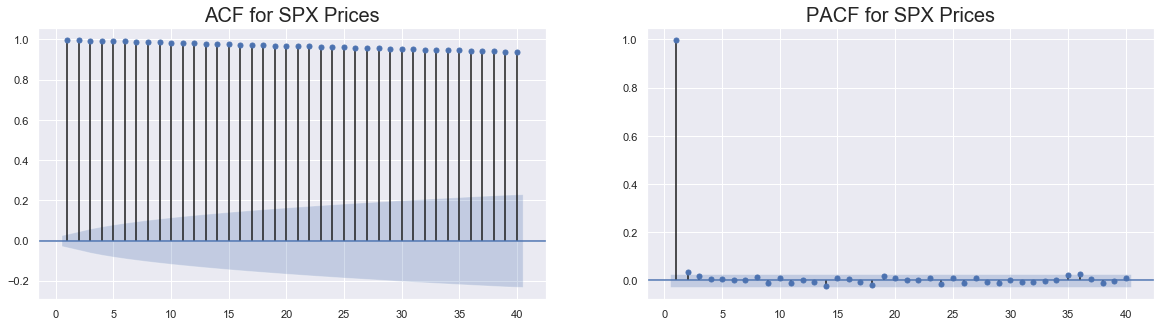

In [7]:
acf_pacf(train_df.spx, "SPX Prices")

#### Defining Max Lags based on ACF and PACF plots

In [8]:
max_lags = 2

#### Fitting all models with lags $<=$ max_lags

AR(1) MODEL
                              ARMA Model Results                              
Dep. Variable:                    spx   No. Observations:                 5353
Model:                     ARMA(1, 0)   Log Likelihood              -21393.258
Method:                       css-mle   S.D. of innovations             13.156
Date:                Sat, 13 Jun 2020   AIC                          42792.516
Time:                        14:24:29   BIC                          42812.272
Sample:                    01-06-1994   HQIC                         42799.416
                         - 07-14-2014                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1214.8506    408.503      2.974      0.003     414.199    2015.502
ar.L1.spx      0.9997      0.000   2965.230      0.000       0.999       1.000
                                    Root

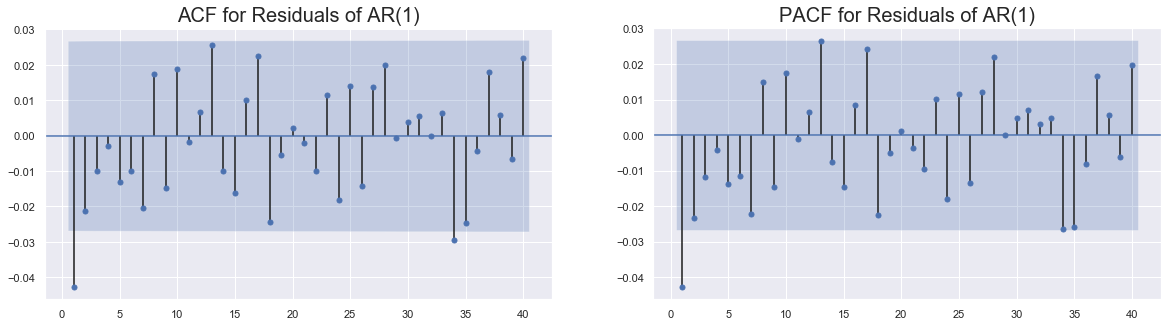

-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
AR(2) MODEL
                              ARMA Model Results                              
Dep. Variable:                    spx   No. Observations:                 5353
Model:                     ARMA(2, 0)   Log Likelihood              -21381.528
Method:                       css-mle   S.D. of innovations             13.127
Date:                Sat, 13 Jun 2020   AIC                          42771.055
Time:                        14:24:32   BIC                          42797.397
Sample:                    01-06-1994   HQIC                         42780.256
                         - 07-14-2014              

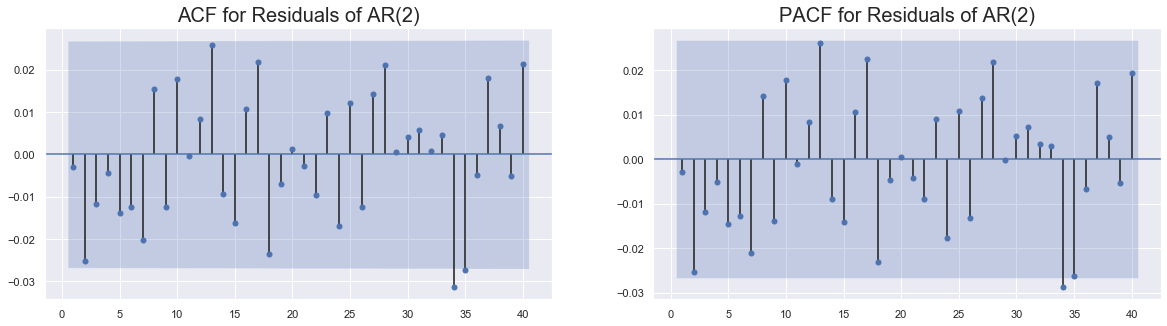

-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------


In [9]:
for i in range(1, max_lags+1):
    ar_model = ARMA(train_df.spx, order=(i, 0))
    ar_model_results = ar_model.fit()
    
    print("AR(%0.0f) MODEL" % i)
    print(ar_model_results.summary())
    acf_pacf(ar_model_results.resid, "Residuals of AR("+str(i)+")")
    
    print("-------------------------------------------------------------------------------------------------------------------------------")
    print("-------------------------------------------------------------------------------------------------------------------------------")
    print("-------------------------------------------------------------------------------------------------------------------------------")

#### LLR Test between models with significant coefficients

In [10]:
ar_1 = ARMA(train_df.spx, order=(1, 0)).fit()
ar_2 = ARMA(train_df.spx, order=(2, 0)).fit()

In [11]:
LLR_test(ar_1, ar_2, DF=1)

0.0

#### Predictions over Test Set

In [12]:
start_date, end_date = test_df.index[0], test_df.index[-1]

In [13]:
pred_df = ar_2.predict(start = start_date, end = end_date)

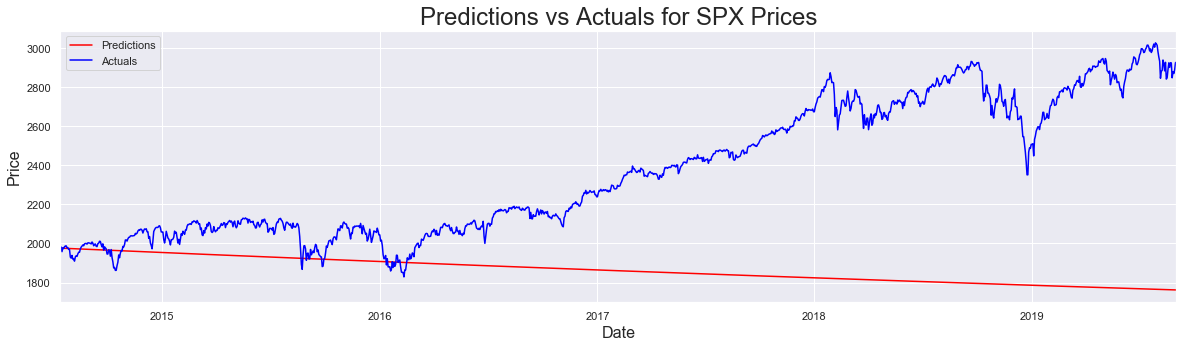

In [14]:
pred_df[start_date:end_date].plot(figsize = (20,5), color = "red", label='Predictions')
test_df.spx[start_date:end_date].plot(color = "blue", label='Actuals')

plt.title("Predictions vs Actuals for SPX Prices", size = 24)
plt.xlabel('Date', size=16)
plt.ylabel('Price', size=16)

plt.legend()
plt.show()

# AR For SPX Returns

#### ACF and PACF Plots for SPX Returns

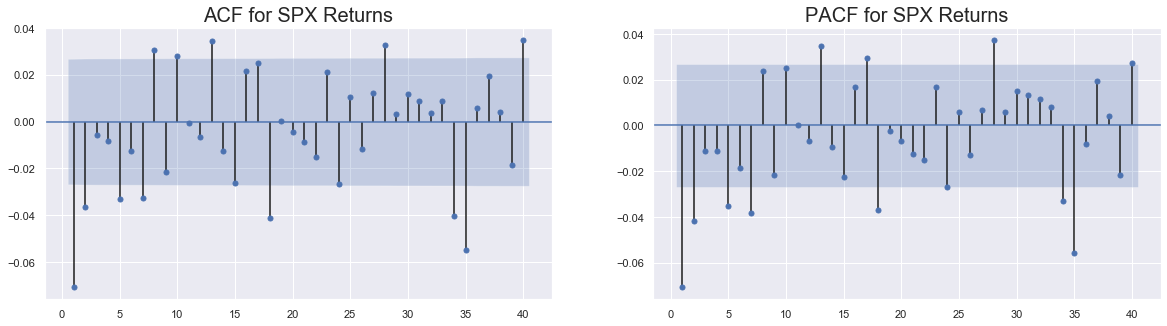

In [15]:
acf_pacf(train_df.spx_ret[1:], "SPX Returns")

#### Defining Max Lags based on ACF and PACF plots

In [16]:
max_lags = 7

#### Fitting all models with lags $<=$ max_lags

AR(1) MODEL
                              ARMA Model Results                              
Dep. Variable:                spx_ret   No. Observations:                 5352
Model:                     ARMA(1, 0)   Log Likelihood               -8485.701
Method:                       css-mle   S.D. of innovations              1.181
Date:                Sat, 13 Jun 2020   AIC                          16977.402
Time:                        14:24:38   BIC                          16997.158
Sample:                    01-07-1994   HQIC                         16984.302
                         - 07-14-2014                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0340      0.015      2.252      0.024       0.004       0.064
ar.L1.spx_ret    -0.0706      0.014     -5.180      0.000      -0.097      -0.044
                            

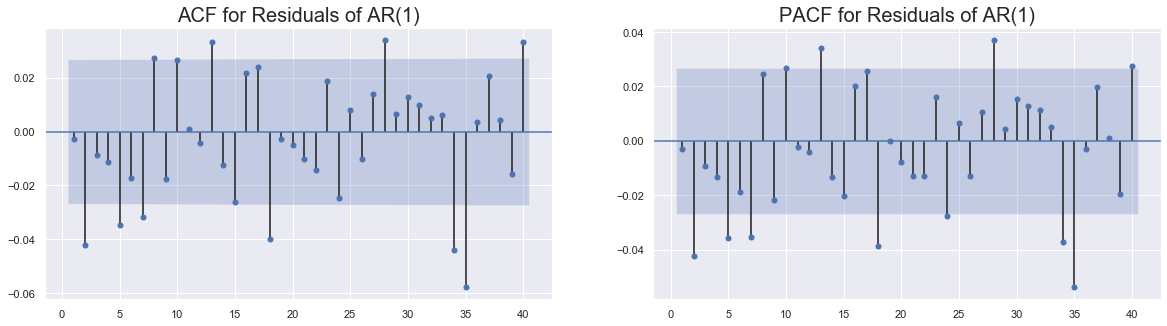

-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
AR(2) MODEL
                              ARMA Model Results                              
Dep. Variable:                spx_ret   No. Observations:                 5352
Model:                     ARMA(2, 0)   Log Likelihood               -8481.048
Method:                       css-mle   S.D. of innovations              1.180
Date:                Sat, 13 Jun 2020   AIC                          16970.095
Time:                        14:24:39   BIC                          16996.436
Sample:                    01-07-1994   HQIC                         16979.295
                         - 07-14-2014              

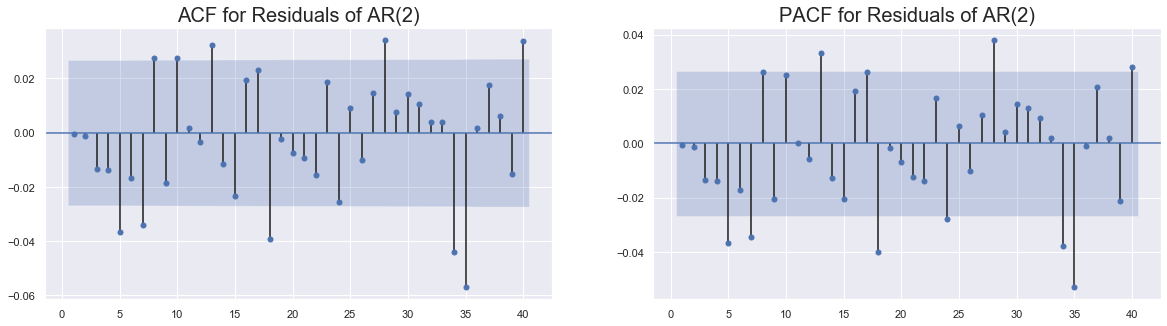

-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
AR(3) MODEL
                              ARMA Model Results                              
Dep. Variable:                spx_ret   No. Observations:                 5352
Model:                     ARMA(3, 0)   Log Likelihood               -8480.703
Method:                       css-mle   S.D. of innovations              1.180
Date:                Sat, 13 Jun 2020   AIC                          16971.406
Time:                        14:24:40   BIC                          17004.332
Sample:                    01-07-1994   HQIC                         16982.906
                         - 07-14-2014              

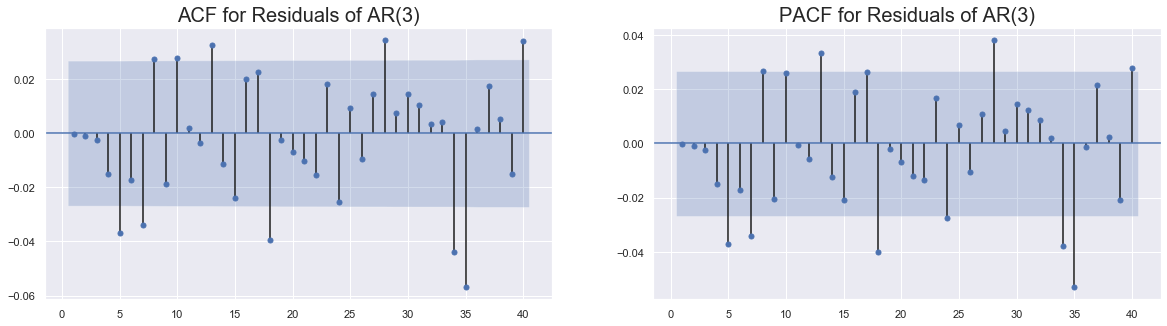

-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
AR(4) MODEL
                              ARMA Model Results                              
Dep. Variable:                spx_ret   No. Observations:                 5352
Model:                     ARMA(4, 0)   Log Likelihood               -8480.358
Method:                       css-mle   S.D. of innovations              1.180
Date:                Sat, 13 Jun 2020   AIC                          16972.716
Time:                        14:24:42   BIC                          17012.228
Sample:                    01-07-1994   HQIC                         16986.517
                         - 07-14-2014              

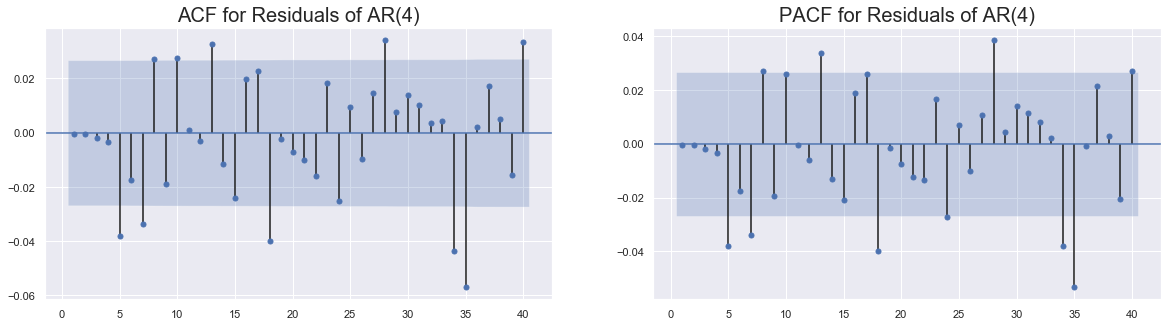

-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
AR(5) MODEL
                              ARMA Model Results                              
Dep. Variable:                spx_ret   No. Observations:                 5352
Model:                     ARMA(5, 0)   Log Likelihood               -8477.013
Method:                       css-mle   S.D. of innovations              1.179
Date:                Sat, 13 Jun 2020   AIC                          16968.027
Time:                        14:24:43   BIC                          17014.123
Sample:                    01-07-1994   HQIC                         16984.127
                         - 07-14-2014              

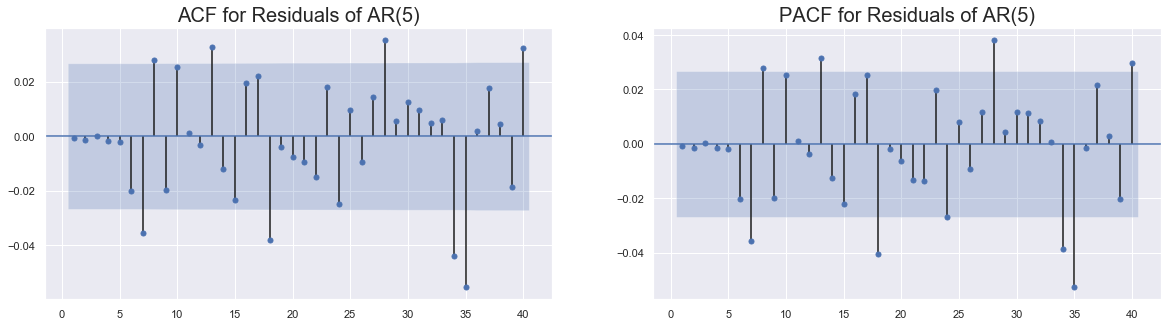

-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
AR(6) MODEL
                              ARMA Model Results                              
Dep. Variable:                spx_ret   No. Observations:                 5352
Model:                     ARMA(6, 0)   Log Likelihood               -8476.083
Method:                       css-mle   S.D. of innovations              1.179
Date:                Sat, 13 Jun 2020   AIC                          16968.166
Time:                        14:24:45   BIC                          17020.848
Sample:                    01-07-1994   HQIC                         16986.567
                         - 07-14-2014              

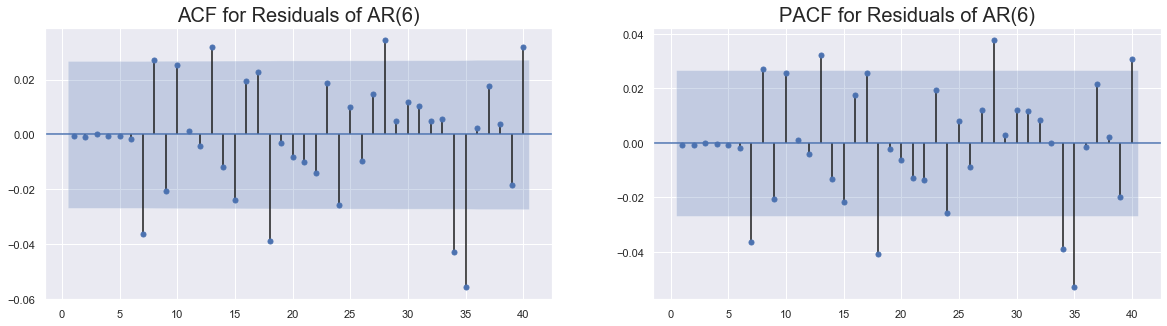

-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
AR(7) MODEL
                              ARMA Model Results                              
Dep. Variable:                spx_ret   No. Observations:                 5352
Model:                     ARMA(7, 0)   Log Likelihood               -8472.193
Method:                       css-mle   S.D. of innovations              1.178
Date:                Sat, 13 Jun 2020   AIC                          16962.386
Time:                        14:24:47   BIC                          17021.653
Sample:                    01-07-1994   HQIC                         16983.087
                         - 07-14-2014              

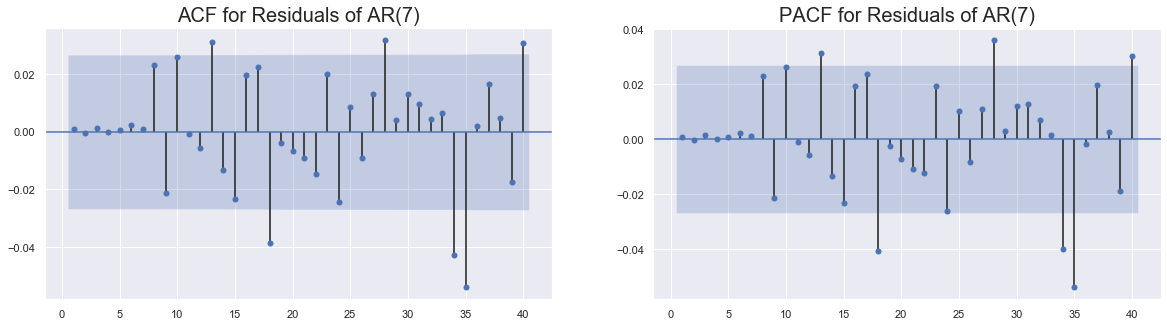

-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------


In [17]:
for i in range(1, max_lags+1):
    ar_model = ARMA(train_df.spx_ret[1:], order=(i, 0))
    ar_model_results = ar_model.fit()
    
    print("AR(%0.0f) MODEL" % i)
    print(ar_model_results.summary())
    acf_pacf(ar_model_results.resid, "Residuals of AR("+str(i)+")")
    
    print("-------------------------------------------------------------------------------------------------------------------------------")
    print("-------------------------------------------------------------------------------------------------------------------------------")
    print("-------------------------------------------------------------------------------------------------------------------------------")

#### LLR Test between models with significant coefficients

In [18]:
ar_1_ret = ARMA(train_df.spx_ret[1:], order=(1, 0)).fit()
ar_2_ret = ARMA(train_df.spx_ret[1:], order=(2, 0)).fit()
ar_3_ret = ARMA(train_df.spx_ret[1:], order=(3, 0)).fit()
ar_4_ret = ARMA(train_df.spx_ret[1:], order=(4, 0)).fit()
ar_5_ret = ARMA(train_df.spx_ret[1:], order=(5, 0)).fit()
ar_6_ret = ARMA(train_df.spx_ret[1:], order=(6, 0)).fit()
ar_7_ret = ARMA(train_df.spx_ret[1:], order=(7, 0)).fit()

In [19]:
LLR_test(ar_1_ret, ar_2_ret, DF=1)

0.002

In [20]:
LLR_test(ar_2_ret, ar_3_ret, DF=1)

0.406

In [21]:
LLR_test(ar_2_ret, ar_4_ret, DF=2)

0.502

In [22]:
LLR_test(ar_2_ret, ar_5_ret, DF=3)

0.045

In [23]:
LLR_test(ar_5_ret, ar_6_ret, DF=1)

0.173

In [24]:
LLR_test(ar_5_ret, ar_7_ret, DF=2)

0.008

In [25]:
LLR_test(ar_2_ret, ar_7_ret, DF=5)

0.003

#### Predictions over Test Set

In [26]:
start_date, end_date = test_df.index[0], test_df.index[-1]

In [27]:
pred_df_ret = ar_7_ret.predict(start = start_date, end = end_date)

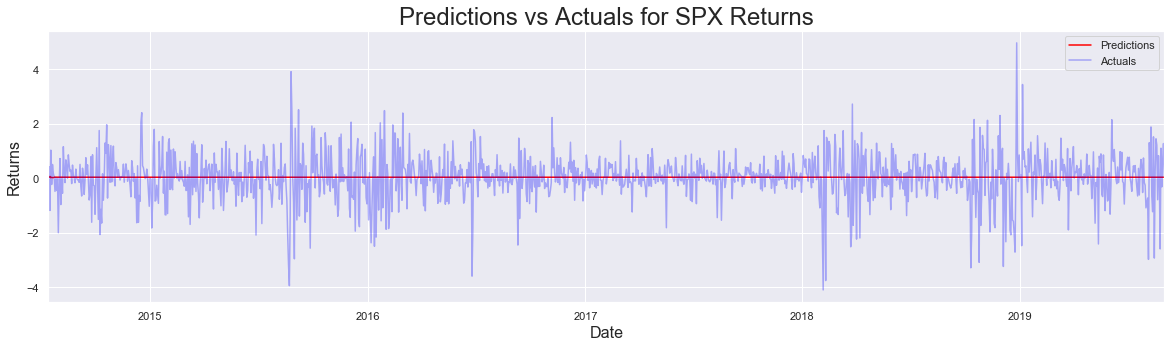

In [28]:
pred_df_ret[start_date:end_date].plot(figsize = (20,5), color = "red", label='Predictions')
test_df.spx_ret[start_date:end_date].plot(color = "blue", label='Actuals', alpha=0.3)

plt.title("Predictions vs Actuals for SPX Returns", size = 24)
plt.xlabel('Date', size=16)
plt.ylabel('Returns', size=16)

plt.legend()
plt.show()

# ARX For SPX Prices

#### ACF and PACF Plots for SPX Prices

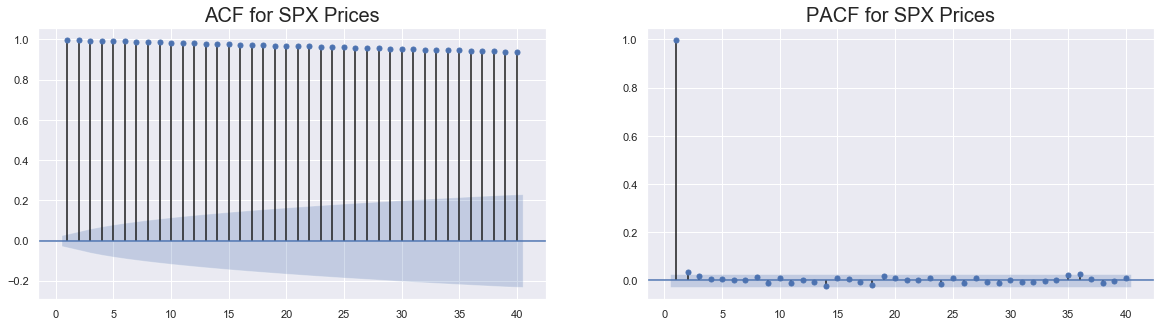

In [29]:
acf_pacf(train_df.spx, "SPX Prices")

#### Defining Max Lags based on ACF and PACF plots

In [30]:
max_lags = 7

#### Fitting all models with lags $<=$ max_lags

AR(1) MODEL
                              ARMA Model Results                              
Dep. Variable:                    spx   No. Observations:                 5353
Model:                     ARMA(1, 0)   Log Likelihood              -20370.571
Method:                       css-mle   S.D. of innovations             10.868
Date:                Sat, 13 Jun 2020   AIC                          40749.141
Time:                        14:24:54   BIC                          40775.483
Sample:                    01-06-1994   HQIC                         40758.342
                         - 07-14-2014                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        296.3504        nan        nan        nan         nan         nan
dax            0.0989      0.002     49.969      0.000       0.095       0.103
ar.L1.spx      0.9997        nan        

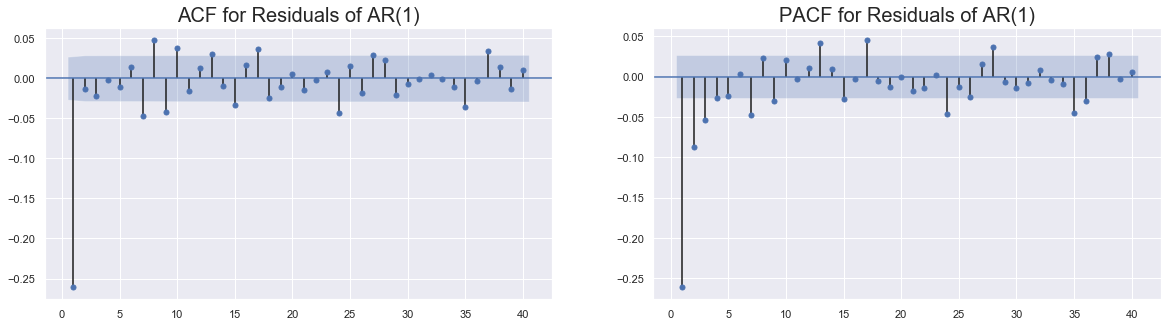

-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
AR(2) MODEL
                              ARMA Model Results                              
Dep. Variable:                    spx   No. Observations:                 5353
Model:                     ARMA(2, 0)   Log Likelihood              -20169.720
Method:                       css-mle   S.D. of innovations             10.469
Date:                Sat, 13 Jun 2020   AIC                          40349.440
Time:                        14:24:57   BIC                          40382.367
Sample:                    01-06-1994   HQIC                         40360.941
                         - 07-14-2014              

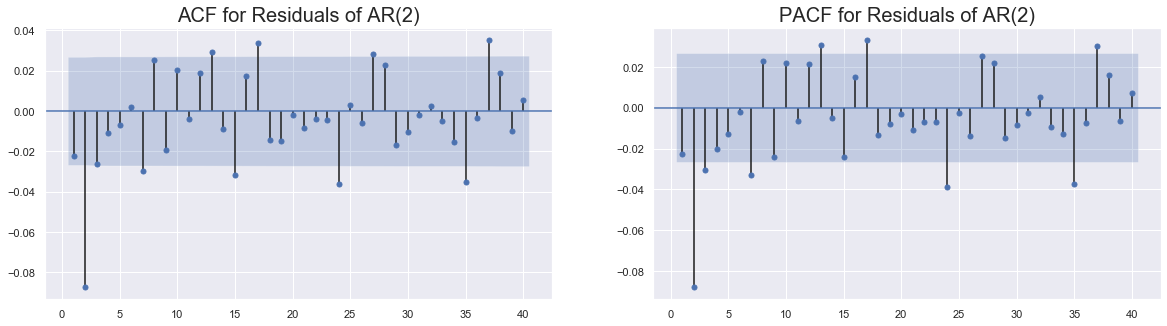

-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
AR(3) MODEL
                              ARMA Model Results                              
Dep. Variable:                    spx   No. Observations:                 5353
Model:                     ARMA(3, 0)   Log Likelihood              -20147.166
Method:                       css-mle   S.D. of innovations             10.424
Date:                Sat, 13 Jun 2020   AIC                          40306.333
Time:                        14:24:59   BIC                          40345.845
Sample:                    01-06-1994   HQIC                         40320.133
                         - 07-14-2014              

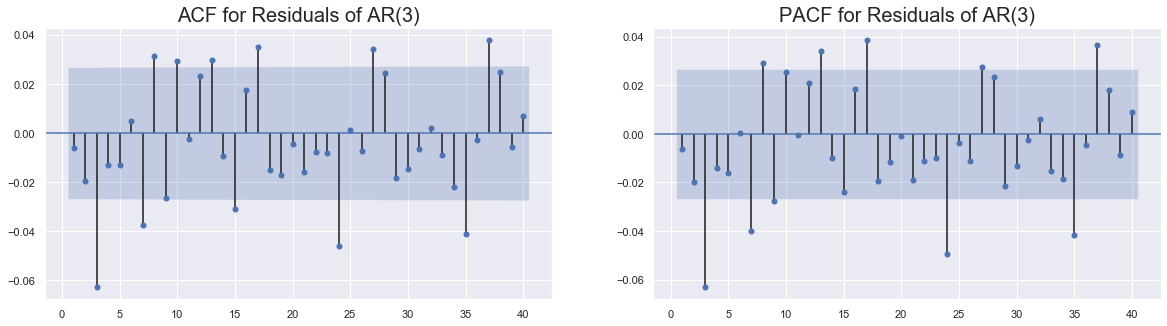

-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
AR(4) MODEL
                              ARMA Model Results                              
Dep. Variable:                    spx   No. Observations:                 5353
Model:                     ARMA(4, 0)   Log Likelihood              -20137.148
Method:                       css-mle   S.D. of innovations             10.405
Date:                Sat, 13 Jun 2020   AIC                          40288.297
Time:                        14:25:02   BIC                          40334.395
Sample:                    01-06-1994   HQIC                         40304.398
                         - 07-14-2014              

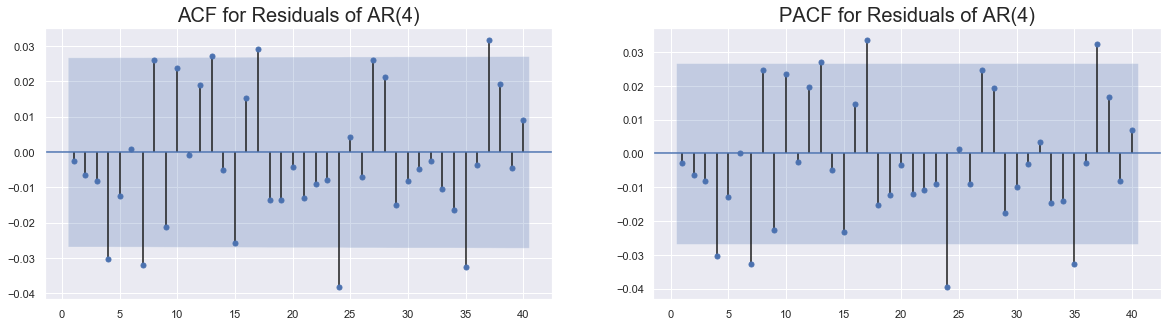

-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
AR(5) MODEL
                              ARMA Model Results                              
Dep. Variable:                    spx   No. Observations:                 5353
Model:                     ARMA(5, 0)   Log Likelihood              -20135.115
Method:                       css-mle   S.D. of innovations             10.401
Date:                Sat, 13 Jun 2020   AIC                          40286.229
Time:                        14:25:07   BIC                          40338.912
Sample:                    01-06-1994   HQIC                         40304.630
                         - 07-14-2014              

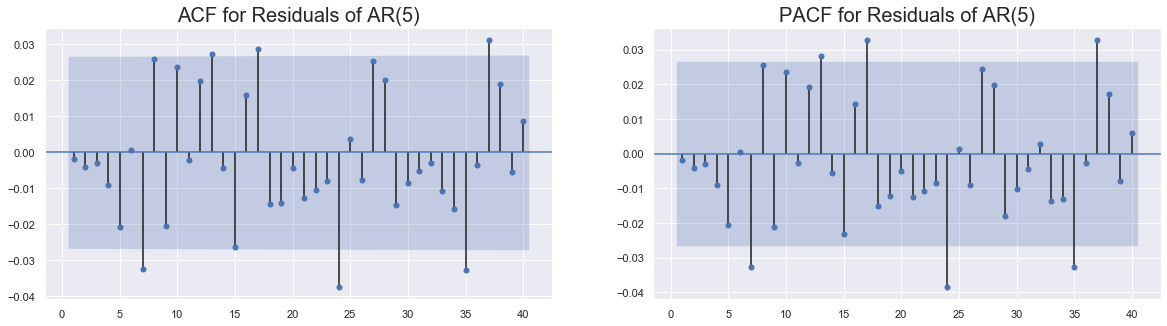

-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
AR(6) MODEL
                              ARMA Model Results                              
Dep. Variable:                    spx   No. Observations:                 5353
Model:                     ARMA(6, 0)   Log Likelihood              -20134.428
Method:                       css-mle   S.D. of innovations             10.399
Date:                Sat, 13 Jun 2020   AIC                          40286.856
Time:                        14:25:10   BIC                          40346.124
Sample:                    01-06-1994   HQIC                         40307.557
                         - 07-14-2014              

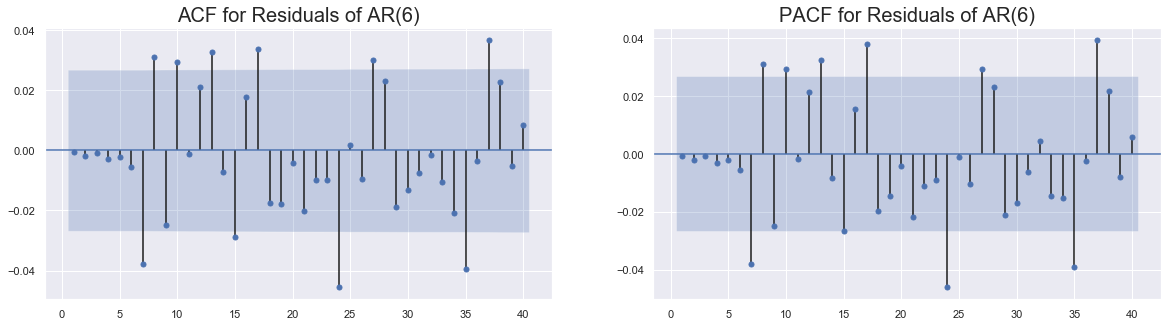

-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
AR(7) MODEL
                              ARMA Model Results                              
Dep. Variable:                    spx   No. Observations:                 5353
Model:                     ARMA(7, 0)   Log Likelihood              -20134.302
Method:                       css-mle   S.D. of innovations             10.399
Date:                Sat, 13 Jun 2020   AIC                          40288.604
Time:                        14:25:14   BIC                          40354.458
Sample:                    01-06-1994   HQIC                         40311.605
                         - 07-14-2014              

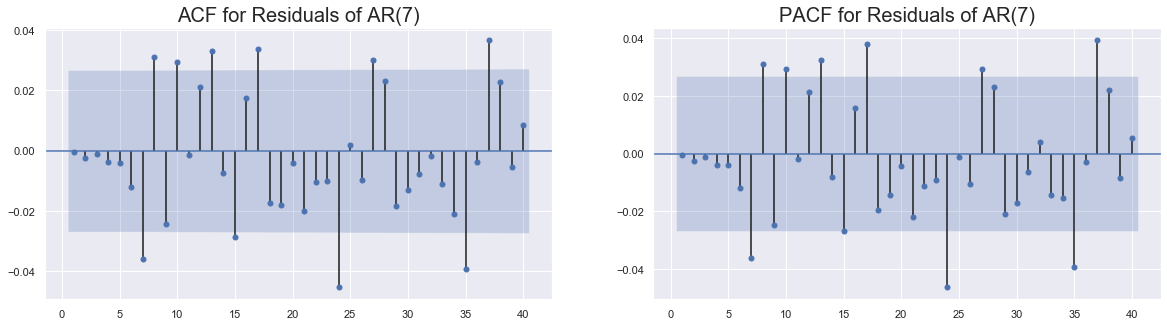

-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------


In [31]:
for i in range(1, max_lags+1):
    ar_model = ARMA(train_df.spx, order=(i, 0), exog=train_df.dax)
    ar_model_results = ar_model.fit()
    
    print("AR(%0.0f) MODEL" % i)
    print(ar_model_results.summary())
    acf_pacf(ar_model_results.resid, "Residuals of AR("+str(i)+")")
    
    print("-------------------------------------------------------------------------------------------------------------------------------")
    print("-------------------------------------------------------------------------------------------------------------------------------")
    print("-------------------------------------------------------------------------------------------------------------------------------")

#### LLR Test between models with significant coefficients

In [32]:
ar_1_exog = ARMA(train_df.spx, order=(1, 0), exog=train_df.dax).fit()
ar_2_exog = ARMA(train_df.spx, order=(2, 0), exog=train_df.dax).fit()
ar_3_exog = ARMA(train_df.spx, order=(3, 0), exog=train_df.dax).fit()
ar_4_exog = ARMA(train_df.spx, order=(4, 0), exog=train_df.dax).fit()
ar_5_exog = ARMA(train_df.spx, order=(5, 0), exog=train_df.dax).fit()
ar_6_exog = ARMA(train_df.spx, order=(6, 0), exog=train_df.dax).fit()
ar_7_exog = ARMA(train_df.spx, order=(7, 0), exog=train_df.dax).fit()

In [33]:
LLR_test(ar_1_exog, ar_2_exog, DF=1)

0.0

In [34]:
LLR_test(ar_2_exog, ar_3_exog, DF=1)

0.0

In [35]:
LLR_test(ar_3_exog, ar_4_exog, DF=1)

0.0

In [36]:
LLR_test(ar_4_exog, ar_5_exog, DF=1)

0.044

In [37]:
LLR_test(ar_5_exog, ar_6_exog, DF=1)

0.241

In [38]:
LLR_test(ar_5_exog, ar_7_exog, DF=2)

0.444

#### Predictions over Test Set

In [39]:
start_date, end_date = test_df.index[0], test_df.index[-1]

In [40]:
pred_df_exog = ar_5_exog.predict(start=start_date, end=end_date, exog=test_df.dax)

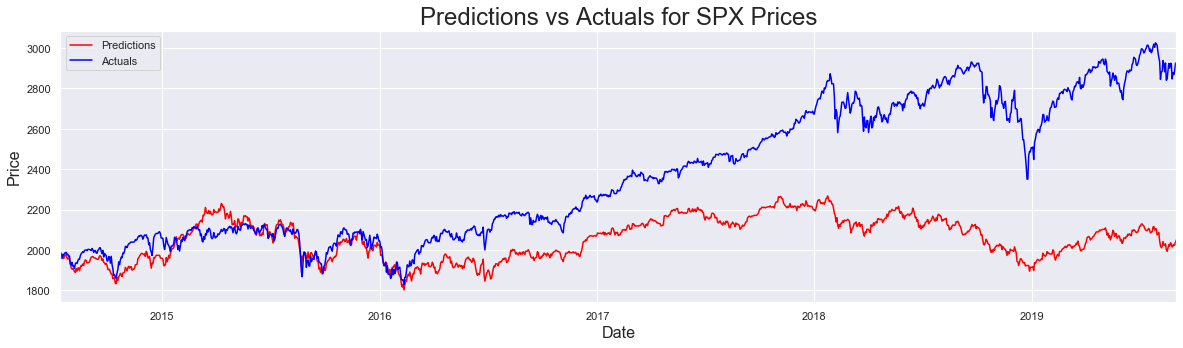

In [41]:
pred_df_exog[start_date:end_date].plot(figsize = (20,5), color = "red", label='Predictions')
test_df.spx[start_date:end_date].plot(color = "blue", label='Actuals')

plt.title("Predictions vs Actuals for SPX Prices", size = 24)
plt.xlabel('Date', size=16)
plt.ylabel('Price', size=16)

plt.legend()
plt.show()

# ARX For SPX Returns

#### ACF and PACF Plots for SPX Returns

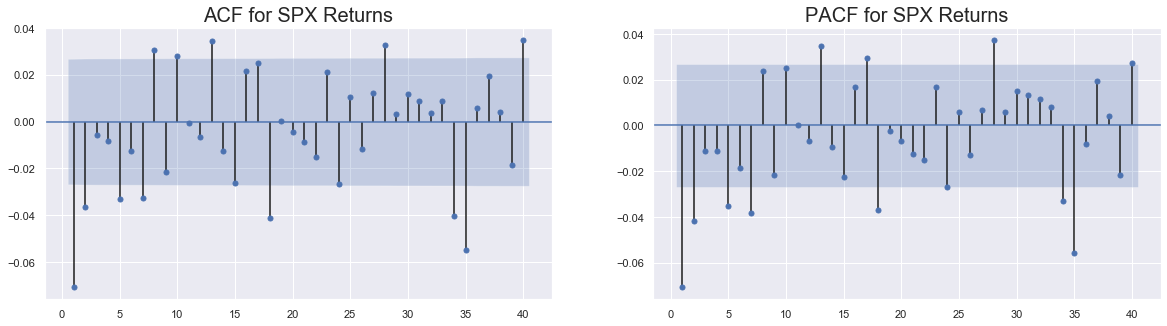

In [42]:
acf_pacf(train_df.spx_ret[1:], "SPX Returns")

#### Defining Max Lags based on ACF and PACF plots

In [43]:
max_lags = 8

#### Fitting all models with lags $<=$ max_lags

AR(1) MODEL
                              ARMA Model Results                              
Dep. Variable:                spx_ret   No. Observations:                 5352
Model:                     ARMA(1, 0)   Log Likelihood               -7279.189
Method:                       css-mle   S.D. of innovations              0.943
Date:                Sat, 13 Jun 2020   AIC                          14566.378
Time:                        14:25:30   BIC                          14592.719
Sample:                    01-07-1994   HQIC                         14575.578
                         - 07-14-2014                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0149      0.010      1.476      0.140      -0.005       0.035
dax_ret           0.4939      0.009     57.130      0.000       0.477       0.511
ar.L1.spx_ret    -0.2748    

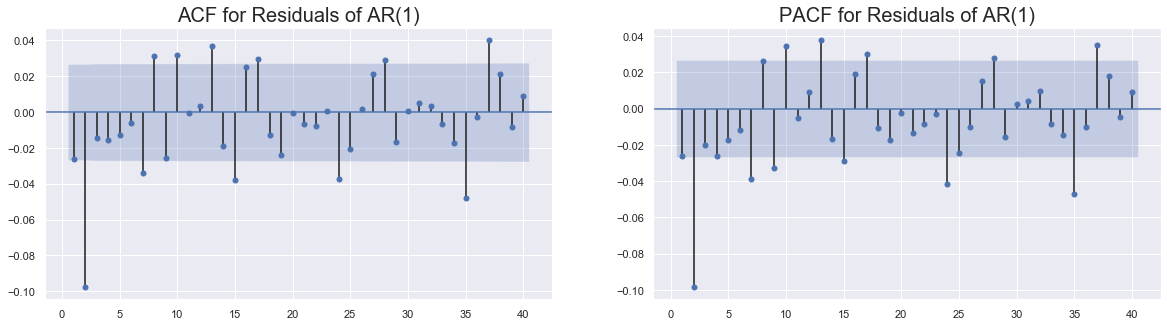

-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
AR(2) MODEL
                              ARMA Model Results                              
Dep. Variable:                spx_ret   No. Observations:                 5352
Model:                     ARMA(2, 0)   Log Likelihood               -7254.998
Method:                       css-mle   S.D. of innovations              0.939
Date:                Sat, 13 Jun 2020   AIC                          14519.996
Time:                        14:25:31   BIC                          14552.922
Sample:                    01-07-1994   HQIC                         14531.497
                         - 07-14-2014              

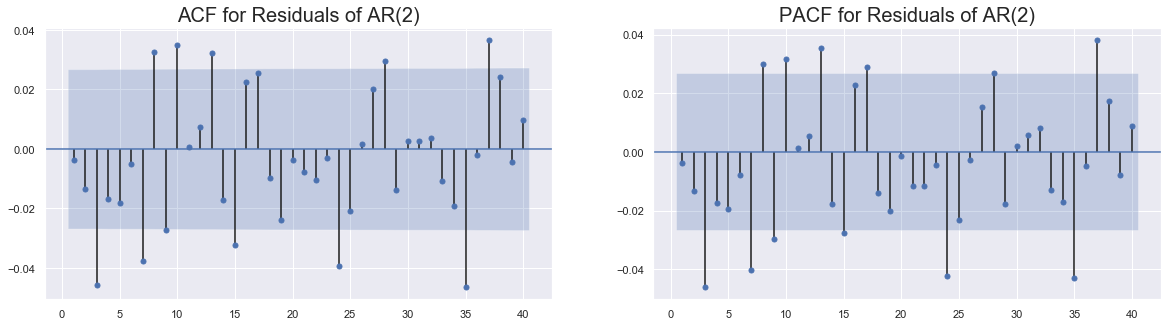

-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
AR(3) MODEL
                              ARMA Model Results                              
Dep. Variable:                spx_ret   No. Observations:                 5352
Model:                     ARMA(3, 0)   Log Likelihood               -7250.570
Method:                       css-mle   S.D. of innovations              0.938
Date:                Sat, 13 Jun 2020   AIC                          14513.139
Time:                        14:25:32   BIC                          14552.651
Sample:                    01-07-1994   HQIC                         14526.940
                         - 07-14-2014              

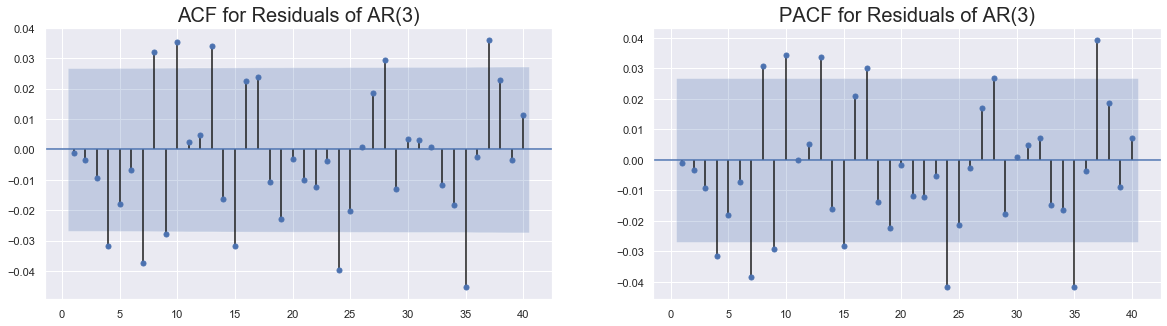

-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
AR(4) MODEL
                              ARMA Model Results                              
Dep. Variable:                spx_ret   No. Observations:                 5352
Model:                     ARMA(4, 0)   Log Likelihood               -7248.846
Method:                       css-mle   S.D. of innovations              0.938
Date:                Sat, 13 Jun 2020   AIC                          14511.691
Time:                        14:25:33   BIC                          14557.788
Sample:                    01-07-1994   HQIC                         14527.792
                         - 07-14-2014              

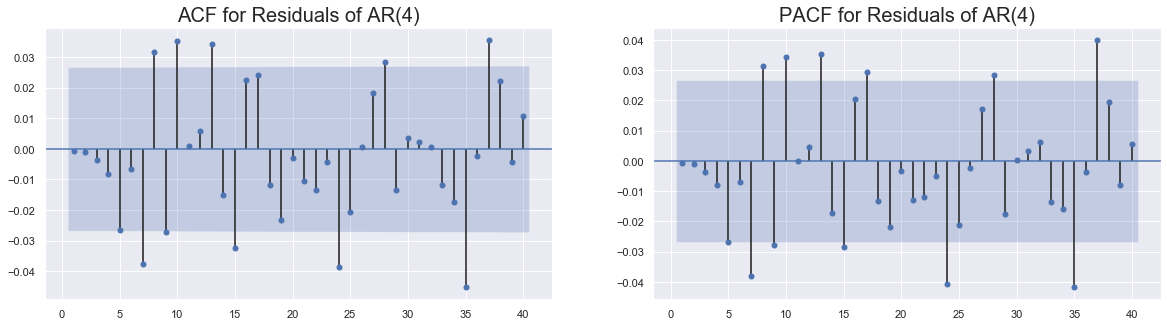

-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
AR(5) MODEL
                              ARMA Model Results                              
Dep. Variable:                spx_ret   No. Observations:                 5352
Model:                     ARMA(5, 0)   Log Likelihood               -7247.327
Method:                       css-mle   S.D. of innovations              0.937
Date:                Sat, 13 Jun 2020   AIC                          14510.654
Time:                        14:25:35   BIC                          14563.336
Sample:                    01-07-1994   HQIC                         14529.055
                         - 07-14-2014              

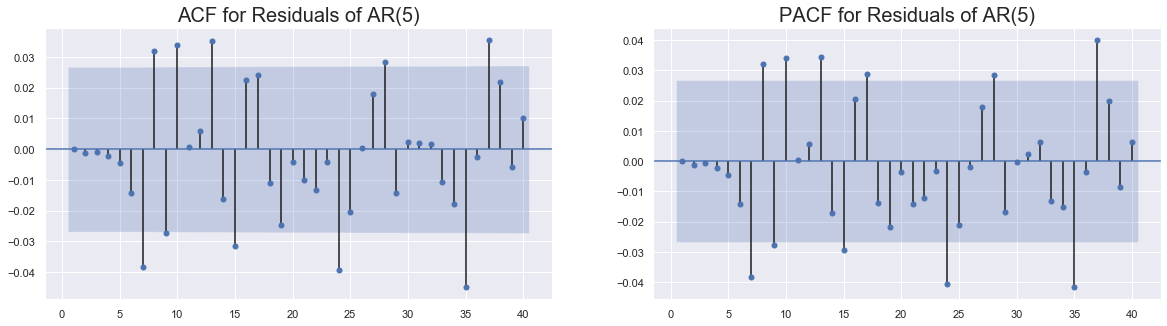

-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
AR(6) MODEL
                              ARMA Model Results                              
Dep. Variable:                spx_ret   No. Observations:                 5352
Model:                     ARMA(6, 0)   Log Likelihood               -7247.303
Method:                       css-mle   S.D. of innovations              0.937
Date:                Sat, 13 Jun 2020   AIC                          14512.607
Time:                        14:25:37   BIC                          14571.874
Sample:                    01-07-1994   HQIC                         14533.308
                         - 07-14-2014              

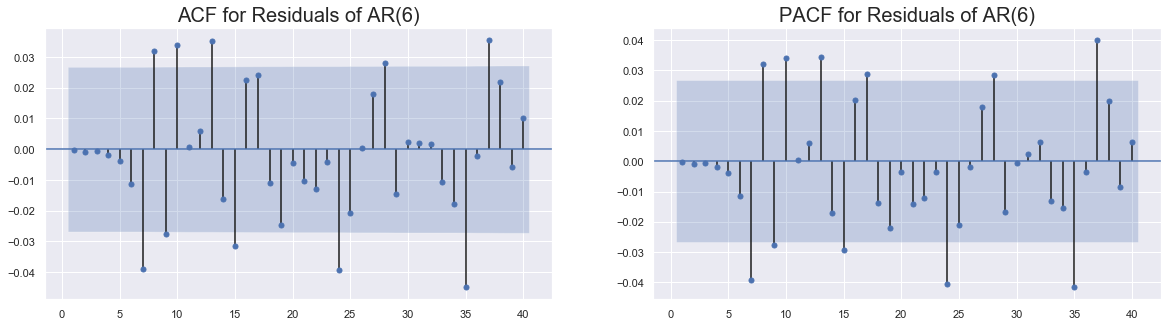

-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
AR(7) MODEL
                              ARMA Model Results                              
Dep. Variable:                spx_ret   No. Observations:                 5352
Model:                     ARMA(7, 0)   Log Likelihood               -7240.936
Method:                       css-mle   S.D. of innovations              0.936
Date:                Sat, 13 Jun 2020   AIC                          14501.871
Time:                        14:25:38   BIC                          14567.723
Sample:                    01-07-1994   HQIC                         14524.872
                         - 07-14-2014              

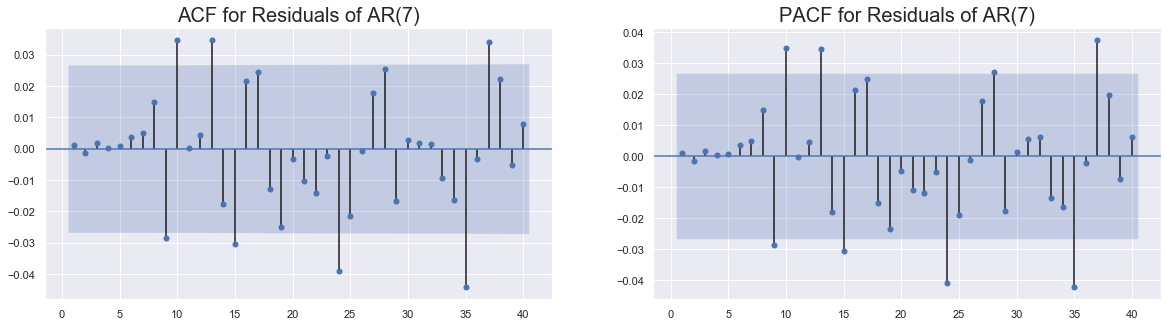

-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
AR(8) MODEL
                              ARMA Model Results                              
Dep. Variable:                spx_ret   No. Observations:                 5352
Model:                     ARMA(8, 0)   Log Likelihood               -7239.348
Method:                       css-mle   S.D. of innovations              0.936
Date:                Sat, 13 Jun 2020   AIC                          14500.696
Time:                        14:25:41   BIC                          14573.133
Sample:                    01-07-1994   HQIC                         14525.997
                         - 07-14-2014              

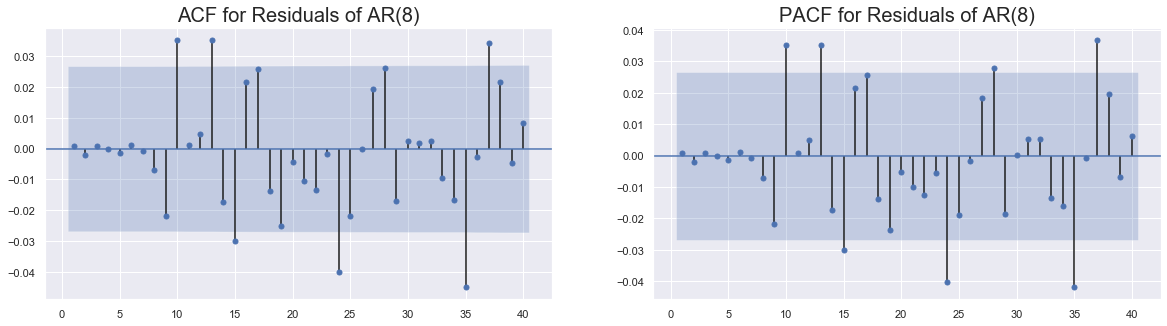

-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------


In [44]:
for i in range(1, max_lags+1):
    ar_model = ARMA(train_df.spx_ret[1:], order=(i, 0), exog=train_df.dax_ret[1:])
    ar_model_results = ar_model.fit()
    
    print("AR(%0.0f) MODEL" % i)
    print(ar_model_results.summary())
    acf_pacf(ar_model_results.resid, "Residuals of AR("+str(i)+")")
    
    print("-------------------------------------------------------------------------------------------------------------------------------")
    print("-------------------------------------------------------------------------------------------------------------------------------")
    print("-------------------------------------------------------------------------------------------------------------------------------")

#### LLR Test between models with significant coefficients

In [45]:
ar_1_exog_ret = ARMA(train_df.spx_ret[1:], order=(1, 0), exog=train_df.dax_ret[1:]).fit()
ar_2_exog_ret = ARMA(train_df.spx_ret[1:], order=(2, 0), exog=train_df.dax_ret[1:]).fit()
ar_3_exog_ret = ARMA(train_df.spx_ret[1:], order=(3, 0), exog=train_df.dax_ret[1:]).fit()
ar_4_exog_ret = ARMA(train_df.spx_ret[1:], order=(4, 0), exog=train_df.dax_ret[1:]).fit()
ar_5_exog_ret = ARMA(train_df.spx_ret[1:], order=(5, 0), exog=train_df.dax_ret[1:]).fit()
ar_6_exog_ret = ARMA(train_df.spx_ret[1:], order=(6, 0), exog=train_df.dax_ret[1:]).fit()
ar_7_exog_ret = ARMA(train_df.spx_ret[1:], order=(7, 0), exog=train_df.dax_ret[1:]).fit()
ar_8_exog_ret = ARMA(train_df.spx_ret[1:], order=(8, 0), exog=train_df.dax_ret[1:]).fit()

In [46]:
LLR_test(ar_1_exog_ret, ar_2_exog_ret, DF=1)

0.0

In [47]:
LLR_test(ar_2_exog_ret, ar_3_exog_ret, DF=1)

0.003

In [48]:
LLR_test(ar_3_exog_ret, ar_4_exog_ret, DF=1)

0.063

In [49]:
LLR_test(ar_3_exog_ret, ar_5_exog_ret, DF=2)

0.039

In [50]:
LLR_test(ar_5_exog_ret, ar_6_exog_ret, DF=1)

0.828

In [51]:
LLR_test(ar_5_exog_ret, ar_7_exog_ret, DF=2)

0.002

In [52]:
LLR_test(ar_7_exog_ret, ar_8_exog_ret, DF=1)

0.075

#### Predictions over Test Set

In [53]:
start_date, end_date = test_df.index[0], test_df.index[-1]

In [54]:
pred_df_exog_ret = ar_7_exog_ret.predict(start=start_date, end=end_date, exog=test_df.dax_ret)

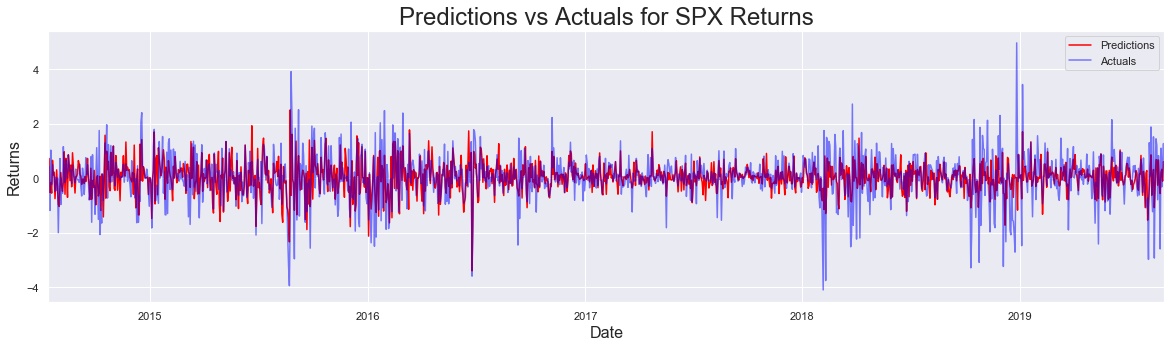

In [55]:
pred_df_exog_ret[start_date:end_date].plot(figsize = (20,5), color = "red", label='Predictions')
test_df.spx_ret[start_date:end_date].plot(color = "blue", label='Actuals', alpha=0.5)

plt.title("Predictions vs Actuals for SPX Returns", size = 24)
plt.xlabel('Date', size=16)
plt.ylabel('Returns', size=16)

plt.legend()
plt.show()

# Comparing Prediction Accuracies

In [56]:
start, end = test_df.index[0], test_df.index[-1]

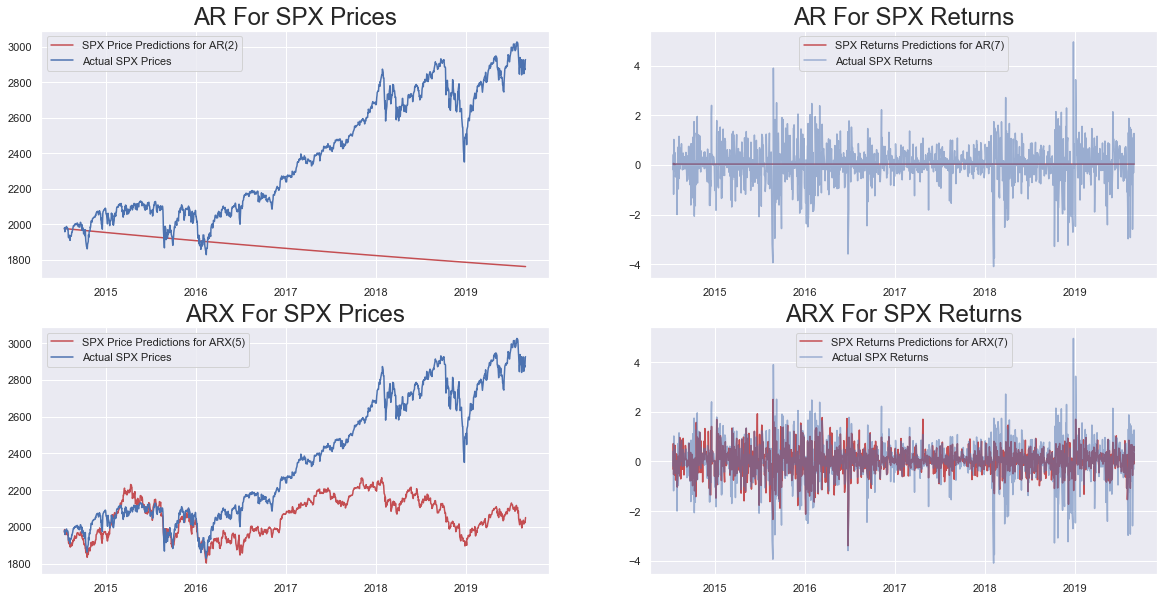

In [57]:
plt.rcParams['figure.figsize'] = 20, 10

fig, ax = plt.subplots(2, 2)

ax[0, 0].plot(pred_df[start:end], color='r', label='SPX Price Predictions for AR(2)')
ax[0, 0].plot(test_df.spx[start:end], color='b', label='Actual SPX Prices')
ax[0, 0].set_title('AR For SPX Prices', size=24)
ax[0, 0].legend()

ax[0, 1].plot(pred_df_ret[start:end], color='r', label='SPX Returns Predictions for AR(7)')
ax[0, 1].plot(test_df.spx_ret[start:end], color='b', label='Actual SPX Returns', alpha=0.5)
ax[0, 1].set_title('AR For SPX Returns', size=24)
ax[0, 1].legend()

ax[1, 0].plot(pred_df_exog[start:end], color='r', label='SPX Price Predictions for ARX(5)')
ax[1, 0].plot(test_df.spx[start:end], color='b', label='Actual SPX Prices')
ax[1, 0].set_title('ARX For SPX Prices', size=24)
ax[1, 0].legend()

ax[1, 1].plot(pred_df_exog_ret[start:end], color='r', label='SPX Returns Predictions for ARX(7)')
ax[1, 1].plot(test_df.spx_ret[start:end], color='b', label='Actual SPX Returns', alpha=0.5)
ax[1, 1].set_title('ARX For SPX Returns', size=24)
ax[1, 1].legend()

plt.show()

#### RMSE: AR(2) on SPX Prices

In [58]:
mse = mean_squared_error(test_df.spx.values, pred_df.values)
rmse = sqrt(mse)

print("Root Mean Squared Error: "+str(rmse))

Root Mean Squared Error: 641.7990259866372


#### RMSE: AR(7) on SPX Returns

In [59]:
mse = mean_squared_error(test_df.spx_ret.values, pred_df_ret.values)
rmse = sqrt(mse)

print("Root Mean Squared Error: "+str(rmse))

Root Mean Squared Error: 0.839004071352296


#### RMSE: ARX(5) on SPX Prices

In [60]:
mse = mean_squared_error(test_df.spx.values, pred_df_exog.values)
rmse = sqrt(mse)

print("Root Mean Squared Error: "+str(rmse))

Root Mean Squared Error: 431.49772791505126


#### RMSE: ARX(7) on SPX Returns

In [61]:
mse = mean_squared_error(test_df.spx_ret.values, pred_df_exog_ret.values)
rmse = sqrt(mse)

print("Root Mean Squared Error: "+str(rmse))

Root Mean Squared Error: 0.7293698064619354
